# Final Project

Ella Zaputil  
5/9/2025

### Importing Data

In [11]:
import pandas as pd
integrated_df = pd.read_csv('edzaputil_IntegratedMovieData.csv', encoding='utf-8')
integrated_df = integrated_df.drop(columns=['Unnamed: 0'])
display(integrated_df)

,Movie Title,Release Year,Runtime,IMDB_Rating,Director,Star1,Star2,Star3,Star4,Action,...,Sci-Fi,Sport,Thriller,War,Western,Ranking,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,The Shawshank Redemption,1994,142,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,0,...,0,0,0,0,0,NaN,1994-09-23,25000000,28313053,28784937
1,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,1,...,0,0,0,0,0,128.0,2008-07-11,185000000,536625724,1010086005
2,The Godfather: Part II,1974,202,9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,0,...,0,0,0,0,0,NaN,1974-12-11,13000000,57300000,57386697
3,The Lord of the Rings: The Return of the King,2003,201,8.9,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1,...,0,0,0,0,0,558.0,2003-12-17,94000000,381472917,1123837908
4,Inception,2010,148,8.8,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,1,...,1,0,0,0,0,203.0,2010-07-16,160000000,293662683,826873382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,The Bridges of Madison County,1995,135,7.6,Clint Eastwood,Clint Eastwood,Meryl Streep,Annie Corley,Victor Slezak,0,...,0,0,0,0,0,NaN,1995-06-02,22000000,71516617,175516617
310,Home Alone,1990,103,7.6,Chris Columbus,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,0,...,0,0,0,0,0,NaN,1990-11-16,15000000,285761243,476678838
311,The Godfather: Part III,1990,162,7.6,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,0,...,0,0,0,0,0,NaN,1990-12-25,54000000,66666062,66785536
312,Lethal Weapon,1987,109,7.6,Richard Donner,Mel Gibson,Danny Glover,Gary Busey,Mitchell Ryan,1,...,0,0,1,0,0,NaN,1987-03-06,15000000,65192350,120192350


In [148]:
print(integrated_df.dtypes)

Movie Title                  object
Release Year                  int32
Runtime                       int64
IMDB_Rating                 float64
Director                     object
Star1                        object
Star2                        object
Star3                        object
Star4                        object
Action                        int64
Adventure                     int64
Animation                     int64
Biography                     int64
Comedy                        int64
Crime                         int64
Drama                         int64
Family                        int64
Fantasy                       int64
Film-Noir                     int64
History                       int64
Horror                        int64
Music                         int64
Musical                       int64
Mystery                       int64
Romance                       int64
Sci-Fi                        int64
Sport                         int64
Thriller                    

### **Research Question 1**: How does a film's production budget impact its gross revenue?

In [13]:
#Import needed modules and libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [14]:
#Drop missing values from necessary columns
budget_df = integrated_df.dropna(subset = ['Production Budget', 'Worldwide Gross'])
display(budget_df)

,Movie Title,Release Year,Runtime,IMDB_Rating,Director,Star1,Star2,Star3,Star4,Action,...,Sci-Fi,Sport,Thriller,War,Western,Ranking,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,The Shawshank Redemption,1994,142,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,0,...,0,0,0,0,0,NaN,1994-09-23,25000000,28313053,28784937
1,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,1,...,0,0,0,0,0,128.0,2008-07-11,185000000,536625724,1010086005
2,The Godfather: Part II,1974,202,9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,0,...,0,0,0,0,0,NaN,1974-12-11,13000000,57300000,57386697
3,The Lord of the Rings: The Return of the King,2003,201,8.9,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1,...,0,0,0,0,0,558.0,2003-12-17,94000000,381472917,1123837908
4,Inception,2010,148,8.8,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,1,...,1,0,0,0,0,203.0,2010-07-16,160000000,293662683,826873382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,The Bridges of Madison County,1995,135,7.6,Clint Eastwood,Clint Eastwood,Meryl Streep,Annie Corley,Victor Slezak,0,...,0,0,0,0,0,NaN,1995-06-02,22000000,71516617,175516617
310,Home Alone,1990,103,7.6,Chris Columbus,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,0,...,0,0,0,0,0,NaN,1990-11-16,15000000,285761243,476678838
311,The Godfather: Part III,1990,162,7.6,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,0,...,0,0,0,0,0,NaN,1990-12-25,54000000,66666062,66785536
312,Lethal Weapon,1987,109,7.6,Richard Donner,Mel Gibson,Danny Glover,Gary Busey,Mitchell Ryan,1,...,0,0,1,0,0,NaN,1987-03-06,15000000,65192350,120192350


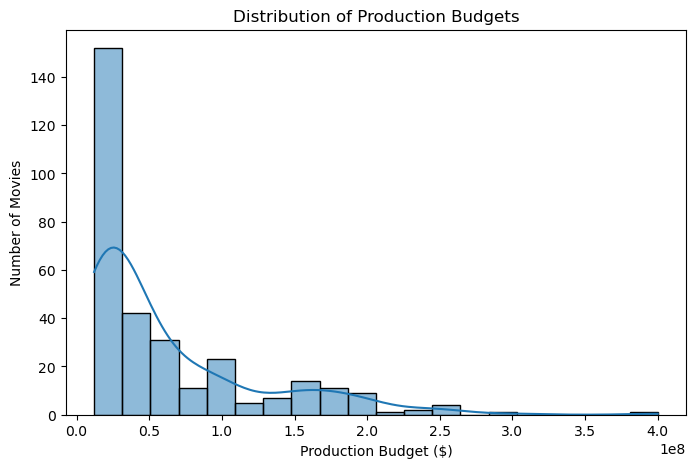

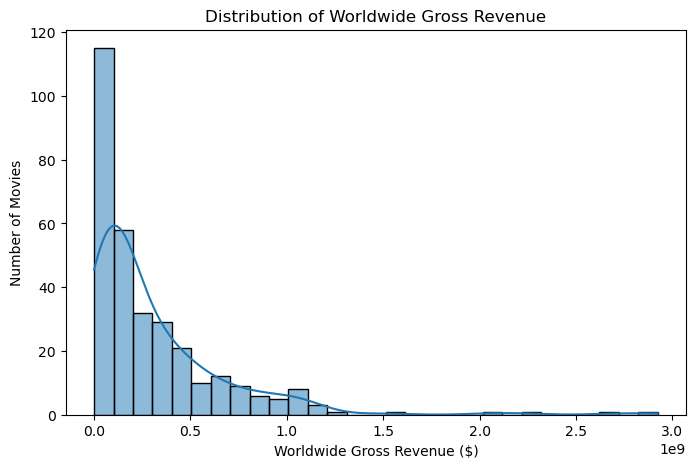

In [15]:
#Analyze distribution of each variable (univariate analysis)
plt.figure(figsize = (8,5))
sns.histplot(integrated_df['Production Budget'].dropna(), kde=True)
plt.title('Distribution of Production Budgets')
plt.xlabel('Production Budget ($)')
plt.ylabel('Number of Movies')
plt.show()

plt.figure(figsize = (8,5))
sns.histplot(integrated_df['Worldwide Gross'].dropna(), kde=True)
plt.title('Distribution of Worldwide Gross Revenue')
plt.xlabel('Worldwide Gross Revenue ($)')
plt.ylabel('Number of Movies')
plt.show()

In [16]:
#Find correlation between budget and revenue (bivariate)
print(f'Correlation: {budget_df['Production Budget'].corr(budget_df['Worldwide Gross'])}')

Correlation: 0.7701041864642673


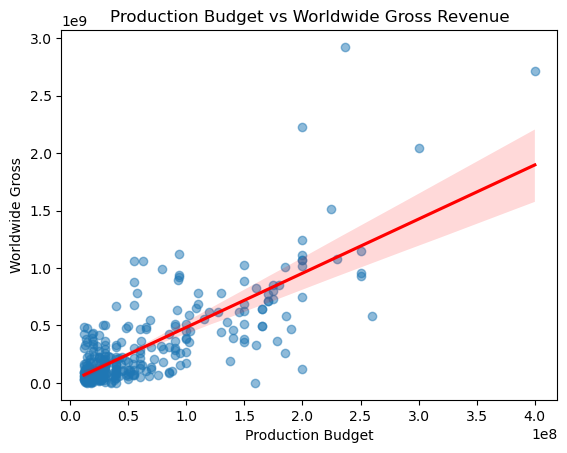

In [17]:
#Create visualization for Production Budget vs. Gross Revenue 
sns.regplot(data = budget_df, x = 'Production Budget', y = 'Worldwide Gross', scatter_kws={'alpha': 0.5}, line_kws = {'color':'red'})
plt.title('Production Budget vs Worldwide Gross Revenue')
plt.show()

In [18]:
#Perform linear regression
X = budget_df[['Production Budget']]
y = budget_df['Worldwide Gross']
model = LinearRegression()
model.fit(X, y)
rsquared = model.score(X, y)
Intercept = model.intercept_
Slope = model.coef_[0]
print('R-Squared:', rsquared)
print(f'Regression Equation: {Intercept} + {Slope}x')

R-Squared: 0.5930604580097902
Regression Equation: 12176232.571649253 + 4.712256087937809x


**Analysis**: There is a positive relationship between production budget and worldwide gross revenue. More specifically, the regression model states that for every 1 dollar increase in budget, there will be a 4.71 dollar increase in gross revenue.  

Additionally, the correlation proves that this is a strong relationship with a correlation of 0.77. 

The R-Squared score of 0.59 also shows a good fit of the Linear Regression model. It shows a moderate fit, which is useful for many real-world problems.

### **Research Question 2:** which variables most positively and negatively affect overall revenue?

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
#Ignore movie title and domestic gross revenue in regression
regression_data = integrated_df.drop(columns = ['Movie Title', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Release Date', 'Domestic Gross'])
regression_data = regression_data.dropna()

#Define variables and target
X = regression_data.drop(columns = ['Worldwide Gross'])
y = regression_data['Worldwide Gross']

In [191]:
#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [199]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.Series(linreg.coef_, index = X_train.columns).sort_values(ascending = False)

pd.set_option('display.float_format', '{:.2f}'.format)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Model Coefficients: {coefficients, .4}')

Mean Squared Error: 1.1859843626854195e+17
R2 Score: -0.5603311022716957
Model Coefficients: (Animation            512009445.05
Fantasy              465250989.49
Thriller             385931140.99
Action               308567511.92
Western              285734530.54
Romance              275000213.67
Comedy               241174483.94
Drama                213578670.01
Crime                180075970.12
IMDB_Rating          162758324.82
Sci-Fi               117894847.38
Adventure             87743229.08
History               62682056.61
War                   48697756.53
Family                14356482.65
Runtime                6188037.51
Ranking                 258587.19
Production Budget            6.71
Music                        0.00
Sport                       -0.00
Musical                     -0.00
Horror                      -0.00
Film-Noir                   -0.00
Release Year         -16788321.00
Release Month        -23161193.99
Mystery             -277180465.58
Biography           -3

Mean Squared Error: 4.071293291201441e+16
R-Squared Score: 0.4643634647637668


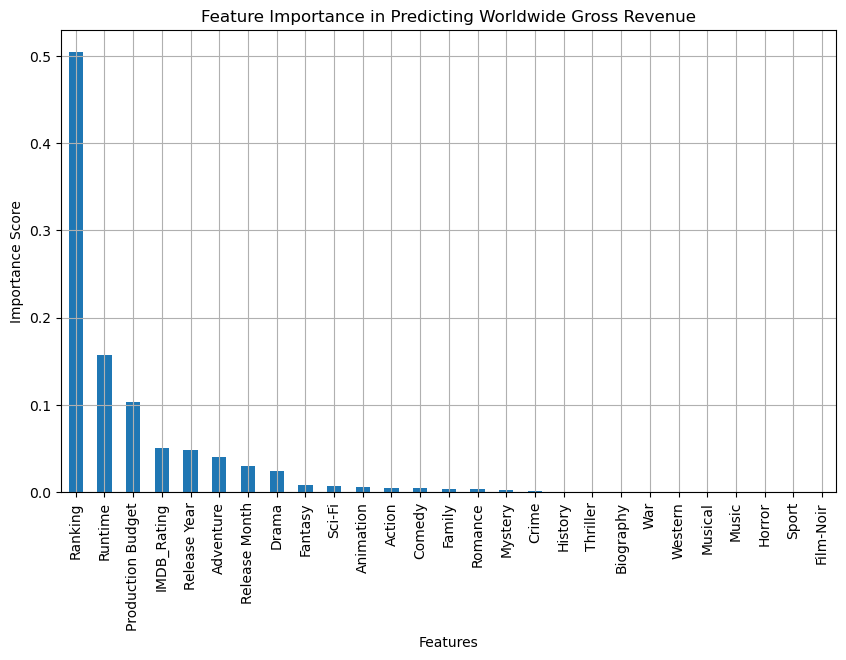

In [189]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature importance analysis
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display results
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")
#print("\nFeature Importance:")
#print(feature_importance)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind="bar")
plt.title("Feature Importance in Predicting Worldwide Gross Revenue")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.grid(True)
plt.show()

In [201]:
#Ridge regression to predict 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
coefficients = pd.Series(ridge.coef_, index = X_train.columns).sort_values(ascending = False)

print(f"Ridge Regression MSE: {mse_ridge:,.2f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")
print(f'Ridge Coefficients: {coefficients}')

Ridge Regression MSE: 111,099,348,868,741,280.00
Ridge Regression R²: -0.4617
Ridge Coefficients: Production Budget    396032507.21
Animation            181677206.57
Runtime              161951955.05
Action               124888206.43
Fantasy              121643146.73
Thriller             103061325.68
Drama                 81003508.50
Comedy                68660223.51
IMDB_Rating           53396870.85
Ranking               45396196.35
Romance               43578662.58
Crime                 38036445.50
Adventure             28344677.70
Sci-Fi                23838892.85
Western               21846309.36
History                2810685.16
War                    1241268.99
Musical                      0.00
Music                        0.00
Horror                       0.00
Film-Noir                    0.00
Sport                        0.00
Family                -8475804.00
Release Month        -74159523.84
Biography            -88651653.52
Mystery              -89475097.33
Release Year      

In [207]:
#Lasso Regression
from sklearn.linear_model import Lasso
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso model (alpha is the regularization strength)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Lasso Regression MSE: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f'Lasso Regression R2: {r2}')

# Show coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Coefficients (including zeros):")
print(lasso_coefficients.sort_values())

Lasso Regression MSE: 118598429164231936.00
Lasso Regression R2: -0.5603310088043936
Lasso Coefficients (including zeros):
Release Year        -115133538.34
Biography            -85284222.58
Mystery              -79683792.71
Release Month        -75157759.82
Music                        0.00
Sport                        0.00
Musical                      0.00
Horror                       0.00
Film-Noir                    0.00
Family                 3848225.59
War                    9423109.24
History               12129101.39
Western               32350324.78
Adventure             40641175.15
Sci-Fi                48899450.71
Crime                 51768185.87
Romance               53213115.61
IMDB_Rating           54265212.68
Ranking               73642205.82
Comedy                90344598.08
Drama                104743436.92
Thriller             123992306.76
Fantasy              141960022.74
Action               154166584.89
Runtime              176224460.89
Animation            216695

**Analysis:** After running 4 different models and comparing them based on Mean Squared Error and R2 score, I found that the Random Forest performed the best, making me believe that the relationships in this data are not very linear. I did find that variables like Production Budget, animation, and runtime postively affected the revenue, while release year and if the film was a biography made it less appealing and affected revenue negatively. The Random Forest showed that Runtime, Production Budget and Release Year were some of the most important factors that attributed to the film's success.

### **Research Question 3:** Do certain actors consistently produce higher grossing films? How much does star power affect a movie's success?

In [75]:
#Melt all actors into one column for analysis
actors_df = pd.melt(integrated_df, id_vars = ['Worldwide Gross'], value_vars = ['Star1', 'Star2', 'Star3', 'Star4'], var_name = 'Actor Position', value_name = 'Actor')
actors_df = actors_df.dropna(subset = ['Actor'])

#Perform summary statistics for actors that appear in 3 or more movies
actor_performance = actors_df.groupby('Actor')['Worldwide Gross'].agg(['mean', 'median', 'count']).sort_values(by = 'mean', ascending = False)
actor_performance = actor_performance[actor_performance['count'] >= 3]
display(actor_performance)

,mean,median,count
Actor,,,
Joe Russo,1658041287.75,1600129670.00,4
Zoe Saldana,1387323335.00,770882395.00,3
Chris Evans,1282360870.80,1151899586.00,5
Robert Downey Jr.,1228458207.14,1151899586.00,7
Sigourney Weaver,1134193466.33,295582480.00,3
...,...,...,...
Catherine Keener,78559265.75,44602670.50,4
Philip Seymour Hoffman,54710391.67,48446802.00,3
Johnny Depp,54367852.20,53980220.00,5


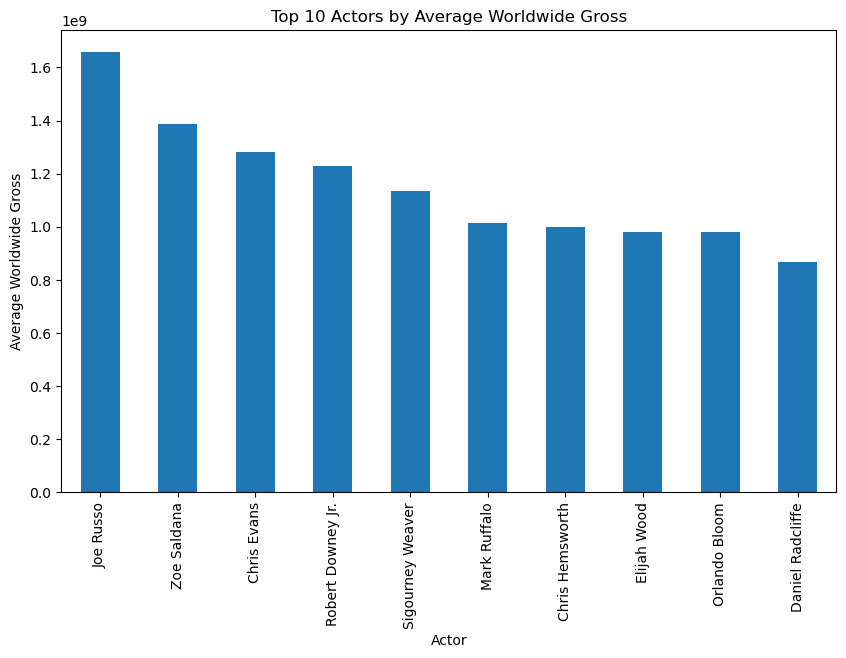

In [22]:
#Visualize which actors consistently produce higher grossing films
actor_performance.head(10).plot(kind = 'bar', y = 'mean', legend = False, figsize = (10,6))
plt.title('Top 10 Actors by Average Worldwide Gross')
plt.ylabel('Average Worldwide Gross')
plt.xlabel('Actor')
plt.show()

**Analysis:** After combining the actor columns, I was able to analyze the average worldwide gross revenue of movies for each actor who starred in 3 or more movies.

I created a bar plot to depict the top 10 actors, and upon further analysis many in the top 10 are stars in popular franchises like Marvel, Lord of the Rings, Avatar, and Harry Potter.

### **Research Question 4:** Does the timing of a movie's release affect its gross revenue?

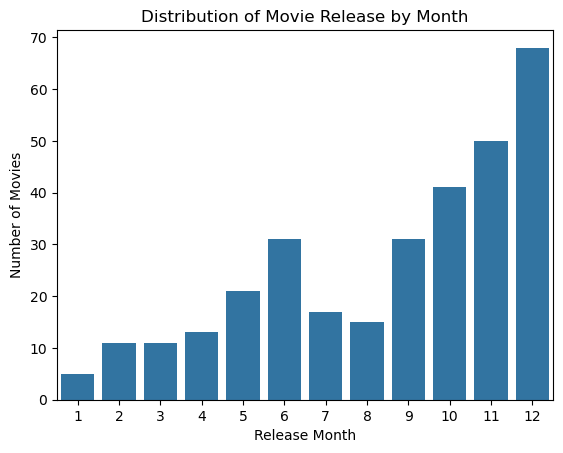

In [25]:
#When are the most movies released?
#Extract release month
integrated_df['Release Month'] = pd.to_datetime(integrated_df['Release Date'], errors = 'coerce').dt.month

#Plot distribution of release months
sns.countplot(x = 'Release Month', data = integrated_df)
plt.title('Distribution of Movie Release by Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.show()

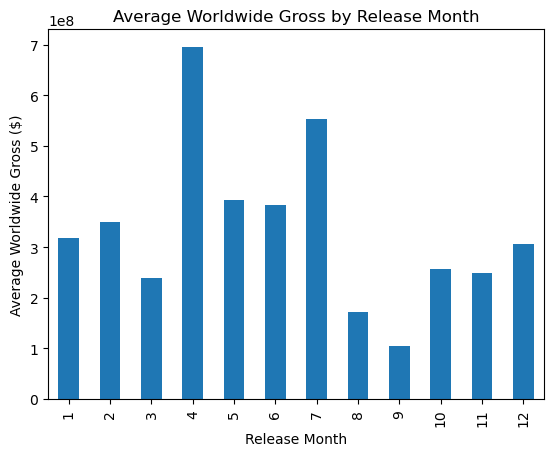

In [26]:
#Finding relationship between release month and worldwide gross
monthly_gross = integrated_df.groupby('Release Month')['Worldwide Gross'].mean()

monthly_gross.plot(kind = 'bar')
plt.title('Average Worldwide Gross by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Worldwide Gross ($)')
plt.show()

In [27]:
#Hypothesis Test: do movies perform better in summer months than in non-summer months?

#Create summer and not summer groups
summer = integrated_df[integrated_df['Release Month'].isin([5,6,7])]
non_summer = integrated_df[~integrated_df['Release Month'].isin([5,6,7])]

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(summer['Worldwide Gross'].dropna(), non_summer['Worldwide Gross'].dropna(), equal_var = False)
print(f'T-Stat: {t_stat: .2f}, P-Value: {p_value: .4f}')

T-Stat:  3.30, P-Value:  0.0012


**Analysis**: With a p-value less than an alpha of 0.05, we fail to reject the null hypothesis that movies released in summer months outperform those released in non-summer months. 

With this information, it's interesting to see that most movies are released in December. We could see a shift in the movie industry in release timelines based on this information. 

### **Research Question 5:** Can you predict revenue over the years based on historical trends?

In [238]:
# Step 1: Convert to datetime and extract year
integrated_df['Release Date'] = pd.to_datetime(integrated_df['Release Date'])
integrated_df['Year'] = integrated_df['Release Date'].dt.year

# Step 2: Group by year and sum worldwide gross revenue
revenue_by_year = integrated_df.groupby('Year')['Worldwide Gross'].sum()

# Step 3: Create a complete time series index for end-of-year
full_index = pd.date_range(
    start=f'{revenue_by_year.index.min()}-12-31',
    end=f'{revenue_by_year.index.max()}-12-31',
    freq='YE'
)

# Step 4: Build time series with datetime index (fill missing years with 0 or NaN)
revenue_series = pd.Series(
    revenue_by_year.values,
    index=pd.to_datetime([f'{year}-12-31' for year in revenue_by_year.index])
).reindex(full_index, fill_value=0)

display(revenue_series)

1956-12-31      85431454
1957-12-31             0
1958-12-31             0
1959-12-31      73226628
1960-12-31      59999883
                 ...    
2016-12-31    5011993753
2017-12-31    4015350688
2018-12-31    5278514461
2019-12-31    6019870701
2020-12-31     120185303
Freq: YE-DEC, Length: 65, dtype: int64

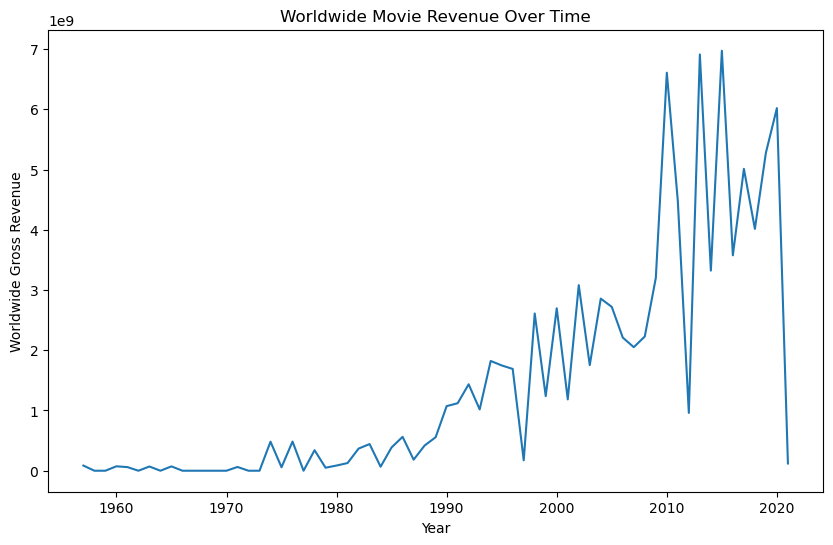

In [240]:
# Plot historical data
plt.figure(figsize=(10,6))
plt.plot(revenue_series.index, revenue_series)
plt.title('Worldwide Movie Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Worldwide Gross Revenue')
plt.show()

C:\Users\Ella\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Ella\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


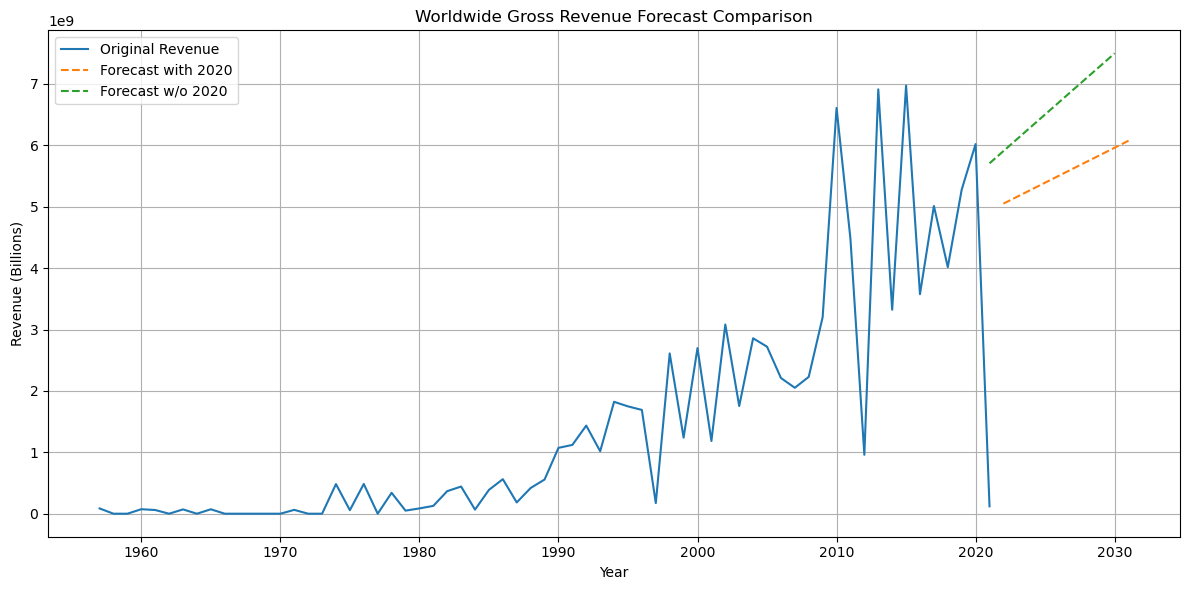

In [270]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Option 1: Keep 2020 and forecast
model_with_2020 = ExponentialSmoothing(
    revenue_series,
    trend='add',
    damped_trend=False,
    initialization_method='estimated'
).fit()
forecast_with_2020 = model_with_2020.forecast(10)

# Option 2: Drop 2020 and forecast
revenue_series_no_2020 = revenue_series[revenue_series.index.year < 2020]
model_no_2020 = ExponentialSmoothing(
    revenue_series_no_2020,
    trend='add',
    damped_trend=False,
    initialization_method='estimated'
).fit()
forecast_no_2020 = model_no_2020.forecast(10)

# Create matching future index starting after the last date in each series
future_years_with_2020 = pd.date_range(
    start=revenue_series.index[-1] + pd.DateOffset(years=1),
    periods=10,
    freq='YE'
)
future_years_no_2020 = pd.date_range(
    start=revenue_series_no_2020.index[-1] + pd.DateOffset(years=1),
    periods=10,
    freq='YE'
)

# Plot both forecasts
plt.figure(figsize=(12, 6))
plt.plot(revenue_series, label='Original Revenue')
plt.plot(future_years_with_2020, forecast_with_2020, label='Forecast with 2020', linestyle='--')
plt.plot(future_years_no_2020, forecast_no_2020, label='Forecast w/o 2020', linestyle='--')
plt.title('Worldwide Gross Revenue Forecast Comparison')
plt.xlabel('Year')
plt.ylabel('Revenue (Billions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Analysis:**